<a href="https://colab.research.google.com/github/TNK443/RecPadroes/blob/main/08_Ensembles_ComparacaoEnsembles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ENSEMBLE - Comparação Ensembles**

#**1. Use uma base de dados para classificação com pelo menos 1000 amostras.**


In [1]:
# ==================== IMPORTS ====================
from IPython.display import clear_output
from sklearn.model_selection import GridSearchCV

# ================== CONSTANTES ===================
NRandom = 42
# =================================================

In [2]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
X.shape, y.shape

((1797, 64), (1797,))

In [3]:
# from sklearn.datasets import fetch_covtype
# clear_output()

# X, y = fetch_covtype(return_X_y=True)
# X.shape, y.shape

In [4]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, random_state=42)
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((1347, 64), (450, 64), (1347,), (450,))

#**2. Escolha pelo menos três algoritmos de classificação.**

Será realizado um teste com diversos modelos/algoritmos para escolher pelo menos 3 para esta atividade.

In [5]:
from sklearn.linear_model   import LogisticRegression
from sklearn.linear_model   import Perceptron
from sklearn.neighbors      import KNeighborsClassifier
from sklearn.svm            import SVC
from sklearn.ensemble       import RandomForestClassifier
from sklearn.tree           import DecisionTreeClassifier
from sklearn.naive_bayes    import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble       import GradientBoostingClassifier
from xgboost                import XGBClassifier

##[LogisticRegression] - (97.33 | 97.56)%


In [6]:
modelo = LogisticRegression(random_state=NRandom, n_jobs=-1) 
modelo.fit(X_tr, y_tr)
LR_pr = modelo.predict(X_te)

LRHits = LR_pr == y_te
# LRHits, 
print(f'LogisticRegression: {sum(LRHits)/len(LRHits)*100:.2f}%')

LogisticRegression: 97.33%


In [7]:
parametrosLR = {
           'penalty': ['l2'],
            # 'dual': [False],
             # 'tol': [0.0001],
               # 'C': [1.0],
   # 'fit_intercept': [True],
#'intercept_scaling': [1],
    # 'class_weight': [None],
      'random_state': [NRandom],
            'solver': ['lbfgs','sag'],
          'max_iter': [100,150],
     # 'multi_class': ['auto'],
         # 'verbose': [0],
      # 'warm_start': [False],
            'n_jobs': [-1],
        # 'l1_ratio': [None]
}

modeloLR = GridSearchCV(LogisticRegression(), param_grid=parametrosLR)
modeloLR.fit(X_tr, y_tr)
LR_pr = modeloLR.predict(X_te)
clear_output()

LRHits = LR_pr == y_te
# LRHits, 
print(f'LogisticRegression(GridSearch):{sum(LRHits)/len(LRHits)*100:.2f}%')

LogisticRegression(GridSearch):97.56%


In [8]:
modeloLR.best_params_

{'max_iter': 150,
 'n_jobs': -1,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'sag'}

##[Perceptron] - (94.89 | 96.44)%

In [9]:
modelo = Perceptron(random_state=NRandom, n_jobs=-1)
modelo.fit(X_tr, y_tr)
PC_pr = modelo.predict(X_te)

PCHits = PC_pr == y_te
# PCHits, 
print(f'Perceptron: {sum(PCHits)/len(PCHits)*100:.2f}%')

Perceptron: 94.89%


In [10]:
parametrosPC = {
         'random_state': [NRandom],
               'n_jobs': [-1],
            # 'penalty': [None],
              # 'alpha': [0.0001],
           # 'l1_ratio': [0.15],            [01| 02| 03| 04| 05| 06| 07| 08| 09| 10| 11| 12| 13| 14| 15| 16| 17| 18| 19| 20]
        'fit_intercept': [False], #96.44  8:[11, 19, 18, 12,  8, 15,  6,  2, 16,  7,  9, 13, 17,  1,  3,  4, 10, 20, 14,  5]
           # 'max_iter': [1000],
                # 'tol': [0.001],
           #  'shuffle': [False], #96,00 11:[19,  4, 10,  3,  7,  1, 13,  2, 20, 17,  8,  9, 12, 15,  5, 16,  6, 18, 14, 11]
            # 'verbose': [0]
               # 'eta0': [1.0],
    #  'early_stopping': [True],  #96.22 12:[17, 18, 15, 16, 20, 12, 19,  5, 10,  6,  8, 14,  3,  4,  2,  9, 11, 13,  1,  7]
# 'validation_fraction': [0.1],
     'n_iter_no_change': [2, 8, 10],
       # 'class_weight': ['balanced'], #96.00 [2,11]
         # 'warm_start': [False]
}

modeloPC = GridSearchCV(Perceptron(), param_grid=parametrosPC)
modeloPC.fit(X_tr, y_tr)
PC_pr = modeloPC.predict(X_te)
clear_output()

PCHits = PC_pr == y_te
# PCHits, 
print(f'Perceptron(GridSearch): {sum(PCHits)/len(PCHits)*100:.2f}%')

Perceptron(GridSearch): 96.44%


In [11]:
modeloPC.best_params_

{'fit_intercept': False,
 'n_iter_no_change': 8,
 'n_jobs': -1,
 'random_state': 42}

##[KNeighborsClassifier] - (99.33 | 99.56)%

In [12]:
modelo = KNeighborsClassifier(n_jobs=-1)
modelo.fit(X_tr, y_tr)
KN_pr = modelo.predict(X_te)

KNHits = KN_pr == y_te
#KNHits, 
print(f'KNeighbors: {sum(KNHits)/len(KNHits)*100:.2f}%')

KNeighbors: 99.33%


In [13]:
parametrosKN = {              #[01| 02| 03| 04| 05| 06| 07| 08| 09| 10| 11| 12| 13| 14| 15| 16| 17| 18| 19| 20]
    'n_neighbors': [6,8,10],  #[ 1,  5,  2,  3,  4,  6,  6,  8,  9, 11, 10, 13, 12, 15, 14, 17, 16, 18, 19, 20]
    #   'weights': ['uniform'],
    # 'algorithm': ['auto'],
    # 'leaf_size': [30],
#             'p': [2],
#        'metric': ['minkowski'],
# 'metric_params': [None],
         'n_jobs': [-1]
}

modeloKN = GridSearchCV(KNeighborsClassifier(), param_grid=parametrosKN)
modeloKN.fit(X_tr, y_tr)
KN_pr = modeloKN.predict(X_te)
clear_output()

KNHits = KN_pr == y_te
#KNHits, 
print(f'KNeighbors(GridSearch): {sum(KNHits)/len(KNHits)*100:.2f}%')

KNeighbors(GridSearch): 99.56%


In [14]:
modeloKN.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

##[SVC] - (98.67 | 99.11)%

In [15]:
modelo = SVC(random_state=NRandom)
modelo.fit(X_tr, y_tr)
SV_pr = modelo.predict(X_te)

SVHits = SV_pr == y_te
#SVHits, 
print(f'SVC: {sum(SVHits)/len(SVHits)*100:.2f}%')

SVC: 98.67%


In [16]:
parametrosSV = {
                       'C': [1,2],
                # 'kernel': ['rbf'], #{'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
                # 'degree': [3],
                #  'gamma': ['scale'],
                #  'coef0': [0.0],
            #  'shrinking': [True],
             'probability': [True],
            #        'tol': [0.001],
            # 'cache_size': [200],
          # 'class_weight': [None],
          #      'verbose': [False],
          #     'max_iter': [-1],
#'decision_function_shape': ['ovr'],
          #   'break_ties': [False],
            'random_state': [NRandom]
}

modeloSV = GridSearchCV(SVC(), param_grid=parametrosSV, n_jobs=-1)
modeloSV.fit(X_tr, y_tr)
SV_pr = modeloSV.predict(X_te)
clear_output()

SVHits = SV_pr == y_te
#SVHits, 
print(f'SVC(GridSearch): {sum(SVHits)/len(SVHits)*100:.2f}%')

SVC(GridSearch): 99.11%


In [17]:
modeloSV.best_params_

{'C': 2, 'probability': True, 'random_state': 42}

##[RandomForestClassifier] - (97.11 | 98.00)%

In [18]:
modelo = RandomForestClassifier(random_state=NRandom, n_jobs=-1)
modelo.fit(X_tr, y_tr)
RF_pr = modelo.predict(X_te)

RFHits = RF_pr == y_te
#RFHits, 
print(f'RandomForest: {sum(RFHits)/len(RFHits)*100:.2f}%')

RandomForest: 97.11%


In [19]:
parametrosRF = {
          #  'n_estimators': [100],
                'criterion': ['entropy','gini'],
                'max_depth': [None, 8, 16],
      # 'min_samples_split': [2],
         'min_samples_leaf': [2],
#'min_weight_fraction_leaf': [0.0],
          #  'max_features': ['auto'],
        #  'max_leaf_nodes': [None],
  # 'min_impurity_decrease': [0.0],
    #  'min_impurity_split': [None],
              # 'bootstrap': [True],
              # 'oob_score': [False],
                   'n_jobs': [-1],
             'random_state': [NRandom],
                # 'verbose': [0],
            #  'warm_start': [False],
          #  'class_weight': [None],
              # 'ccp_alpha': [0.0],
            # 'max_samples': [None]
}

modeloRF = GridSearchCV(RandomForestClassifier(), param_grid=parametrosRF)
modeloRF.fit(X_tr, y_tr)
RF_pr = modeloRF.predict(X_te)
clear_output()

RFHits = RF_pr == y_te
#RFHits, 
print(f'RandomForest(GridSearch): {sum(RFHits)/len(RFHits)*100:.2f}%')

RandomForest(GridSearch): 98.00%


In [20]:
modeloRF.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 2,
 'n_jobs': -1,
 'random_state': 42}

##[DecisionTreeClassifier] - (85.78 | 88.00)%

In [21]:
modelo = DecisionTreeClassifier(random_state=NRandom)
modelo.fit(X_tr, y_tr)
DT_pr = modelo.predict(X_te)

DTHits = DT_pr == y_te
#DTHits, 
print(f'RandomForest: {sum(DTHits)/len(DTHits)*100:.2f}%')

RandomForest: 85.78%


In [22]:
parametrosDT = {
                'criterion': ['entropy','gini'],
                #'splitter': ['best']
                'max_depth': [None, 9], #87.56|87.78
        'min_samples_split': [6,8],
        #'min_samples_leaf': [1],
#'min_weight_fraction_leaf': [0.0],
          #  'max_features': [None],
             'random_state': [NRandom],
        #  'max_leaf_nodes': [None],
  # 'min_impurity_decrease': [0.0],
     # 'min_impurity_split': [None],
          #  'class_weight': [None],
              # 'ccp_alpha': [0.0]
}

modeloDT = GridSearchCV(DecisionTreeClassifier(), param_grid=parametrosDT, n_jobs=-1)
modeloDT.fit(X_tr, y_tr)
DT_pr = modeloDT.predict(X_te)
clear_output()

DTHits = DT_pr == y_te
#DTHits, 
print(f'RandomForest(GridSearch): {sum(DTHits)/len(DTHits)*100:.2f}%')

RandomForest(GridSearch): 88.00%


In [23]:
modeloDT.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_split': 6,
 'random_state': 42}

##[GaussianNB] - (85.56 | 92.89)%

In [24]:
modelo = GaussianNB()
modelo.fit(X_tr, y_tr)
GN_pr = modelo.predict(X_te)

GNHits = GN_pr == y_te
#GNHits, 
print(f'GaussianNB: {sum(GNHits)/len(GNHits)*100:.2f}%')

GaussianNB: 85.56%


In [25]:
parametrosGN = {
         # 'priors': [None],
    'var_smoothing': [1e-01,1e-03,1e-05]
}

modeloGN = GridSearchCV(GaussianNB(), param_grid=parametrosGN, n_jobs=-1)
modeloGN.fit(X_tr, y_tr)
GN_pr = modeloGN.predict(X_te)

GNHits = GN_pr == y_te
#GNHits, 
print(f'GaussianNB(GridSearch): {sum(GNHits)/len(GNHits)*100:.2f}%')

GaussianNB(GridSearch): 92.89%


In [26]:
modeloGN.best_params_

{'var_smoothing': 0.1}

##[MLPClassifier]- (97.11 | 98.22)%

In [27]:
modelo = MLPClassifier(random_state=42)
modelo.fit(X_tr, y_tr)
ML_pr = modelo.predict(X_te)

MLHits = ML_pr == y_te
#MLHits, 
print(f'MLPClassifier: {sum(MLHits)/len(MLHits)*100:.2f}%')

MLPClassifier: 97.11%


In [28]:
parametrosML = {
    'hidden_layer_sizes': [50, 100],
            'activation': ['logistic','relu'], #['identity','logistic','tanh','relu']
              # 'solver': ['adam'], #['lbfgs','sgd','adam']
              #  'alpha': [0.0001],
          # 'batch_size': ['auto'],
      #  'learning_rate': ['constant'], #['constant','invscaling','adaptive']
  # 'learning_rate_init': [0.001],
            #  'power_t': [0.5]
              'max_iter': [50],
            #  'shuffle': [True],
          'random_state': [NRandom],
                #  'tol': [0.0001],
            #  'verbose': [False],
          # 'warm_start': [False],
            # 'momentum': [0.9],
  # 'nesterovs_momentum': [True],
      # 'early_stopping': [False],
#  'validation_fraction': [0.1],
              # 'beta_1': [0.9],
              # 'beta_2': [0.999],
            #  'epsilon': [1e-08],
    # 'n_iter_no_change': [10],
            #  'max_fun': [15000]
}

modeloML = GridSearchCV(MLPClassifier(), param_grid=parametrosML, n_jobs=-1)
modeloML.fit(X_tr, y_tr)
ML_pr = modeloML.predict(X_te)
clear_output()

MLHits = ML_pr == y_te
#MLHits, 
print(f'MLPClassifier(GridSearch): {sum(MLHits)/len(MLHits)*100:.2f}%')

MLPClassifier(GridSearch): 98.22%


In [29]:
modeloML.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': 100,
 'max_iter': 50,
 'random_state': 42}

##[GradientBoostingClassifier] - (97.11 | 98.22)%

In [30]:
modelo = GradientBoostingClassifier(random_state=NRandom)
modelo.fit(X_tr, y_tr)
GB_pr = modelo.predict(X_te)

GBHits = GB_pr == y_te
#GBHits, 
print(f'GradientBoostingClassifier: {sum(GBHits)/len(GBHits)*100:.2f}%')

GradientBoostingClassifier: 97.11%


In [31]:
parametrosGB = {
                   # 'loss': ['deviance'],
            'learning_rate': [0.1],
             'n_estimators': [75], #10:90.67
              # 'subsample': [1.0],
              # 'criterion': ['friedman_mse'],
      # 'min_samples_split': [2],
      #  'min_samples_leaf': [1],
#'min_weight_fraction_leaf': [0.0],
                'max_depth': [4],
  # 'min_impurity_decrease': [0.0],
    #  'min_impurity_split': [None],
                     'init': [None],
             'random_state': [NRandom],
             'max_features': ['sqrt'],
                # 'verbose': [0],
        #  'max_leaf_nodes': [None],
            #  'warm_start': [False],
    # 'validation_fraction': [0.1],
      #  'n_iter_no_change': [None],
              #       'tol': [0.0001],
              # 'ccp_alpha': [0.0]
}

modeloGB = GridSearchCV(GradientBoostingClassifier(), param_grid=parametrosGB, n_jobs=-1)
modeloGB.fit(X_tr, y_tr)
GB_pr = modeloGB.predict(X_te)

GBHits = GB_pr == y_te
#GBHits, 
print(f'GradientBoostingClassifier(GridSearch): {sum(GBHits)/len(GBHits)*100:.2f}%')

GradientBoostingClassifier(GridSearch): 98.22%


In [32]:
modeloGB.best_params_

{'init': None,
 'learning_rate': 0.1,
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 75,
 'random_state': 42}

##[XGBClassifier] - (96.89 | 98.00)%

In [33]:
modelo = XGBClassifier(random_state=NRandom, n_jobs=-1)
modelo.fit(X_tr, y_tr)
XG_pr = modelo.predict(X_te)

XGHits = XG_pr == y_te
#GBHits, 
print(f'XGBClassifier: {sum(XGHits)/len(XGHits)*100:.2f}%')

XGBClassifier: 96.89%


In [34]:
parametrosXG = {
    # 'booster': ['gbtree'], # ['gbtree','gblinear','dart']
    # 'nthread': [4],
    # 'disable_default_eval_metri': [False],
    # 'num_feature': [set automatically by XGBoost, no need to be set by user]
    # 'eta': [0.3],
    # 'gamma': [0],
    # 'max_depth': [10],
    # 'min_child_weight': [1],
    'max_delta_step': [4],
    # 'subsample': [1],
    # 'sampling_method': ['uniform'], #['uniform','gradient_based']
    # 'colsample_bytree': [1],
    'colsample_bylevel':[0.35],#98.00
    'colsample_bynode': [0.5], #97.58
    # 'lambda':[1],
    # 'alpha':[0],
    # 'tree_method': ['auto'], #[auto, exact, approx, hist, gpu_hist]
    # 'learning_rate':[0.15],
    # 'n_estimators': [100],
    'random_state':[42],
    'n_jobs':[-1]
    # '': [],
}

modeloXG = GridSearchCV(XGBClassifier(), param_grid=parametrosXG)
modeloXG.fit(X_tr, y_tr)
XG_pr = modeloXG.predict(X_te)

XGHits = XG_pr == y_te
#GBHits, 
print(f'XGBClassifier(GridSearch): {sum(XGHits)/len(XGHits)*100:.2f}%')

XGBClassifier(GridSearch): 98.00%


In [35]:
modeloXG.best_params_

{'colsample_bylevel': 0.35,
 'colsample_bynode': 0.5,
 'max_delta_step': 4,
 'n_jobs': -1,
 'random_state': 42}

##**COMPORTAMENTO DOS CLASSIFICADORES**

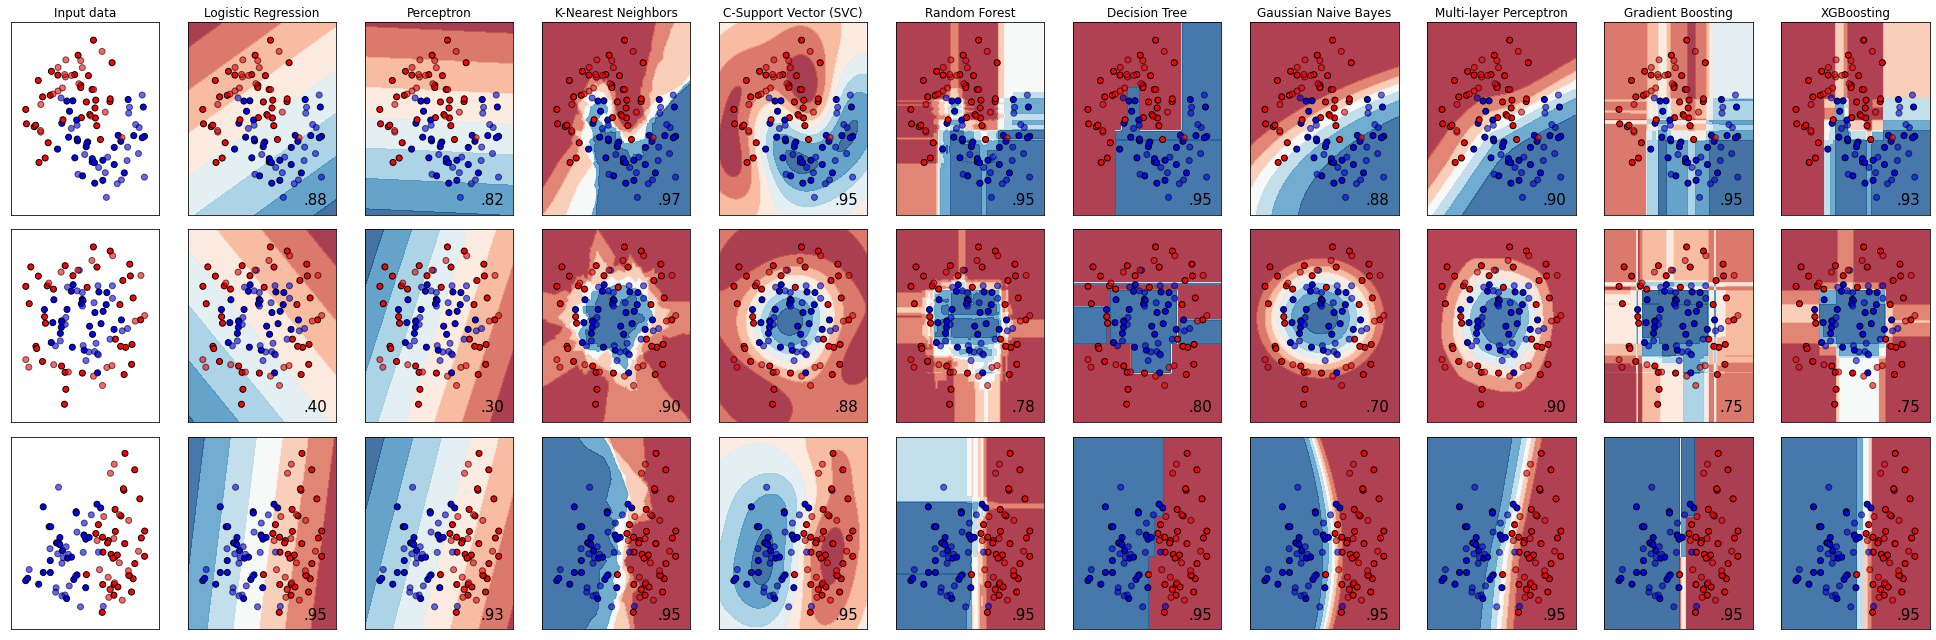

In [36]:
#====================================================================================================
#                                 COMPORTAMENTO DOS CLASSIFICADORES
#====================================================================================================
import numpy as np
import matplotlib.pyplot as plt


from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification


h = .02  # step size in the mesh

names = ["Logistic Regression", "Perceptron",
         "K-Nearest Neighbors", "C-Support Vector (SVC)",
         "Random Forest", "Decision Tree",
         "Gaussian Naive Bayes", "Multi-layer Perceptron", 
         "Gradient Boosting", "XGBoosting"]

classifiers = [
    LogisticRegression(random_state=42),
    Perceptron(random_state=42),
    KNeighborsClassifier(),
    SVC(random_state=42),
    RandomForestClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42),
    GaussianNB(),
    MLPClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    XGBClassifier(random_state=42)
    ]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

clear_output()
plt.tight_layout()
plt.show()
#====================================================================================================

#**3. Combine os classificadores de duas formas diferentes:**



1.   Voting
2.   Stacking

##**3.1 VOTING**

In [37]:
from sklearn.ensemble import VotingClassifier
Voting = VotingClassifier([
                          #  ('lrc', LogisticRegression()),
                          #  ('per', Perceptron()),
                          #  ('knn', KNeighborsClassifier()),
                          #  ('svc', SVC()),
                          #  ('rfc', RandomForestClassifier()),
                           ('dtc', DecisionTreeClassifier()),
                           ('gnb', GaussianNB()),
                          #  ('mlp', MLPClassifier()),
                          #  ('gbc', GradientBoostingClassifier()),
                           ('xgb', XGBClassifier())
])

Voting.fit(X_tr, y_tr)
VO_pr = Voting.predict(X_te)
clear_output()

VOHits = VO_pr == y_te
# vohits, 
print(f'VotingClassifier: {sum(VOHits)/len(VOHits)*100:.2f}%')

VotingClassifier: 96.22%


In [38]:
from sklearn.ensemble import VotingClassifier
Voting = VotingClassifier([
                          #  ('lrc', LogisticRegression(random_state=NRandom)),
                          #  ('per', Perceptron(random_state=NRandom)),
                          #  ('knn', KNeighborsClassifier()),
                          #  ('svc', SVC(random_state=NRandom)),
                          #  ('rfc', RandomForestClassifier(random_state=NRandom)),
                           ('dtc', DecisionTreeClassifier(random_state=NRandom)),
                           ('gnb', GaussianNB()),
                          #  ('mlp', MLPClassifier(random_state=NRandom)),
                          #  ('gbc', GradientBoostingClassifier(random_state=NRandom)),
                           ('xgb', XGBClassifier(random_state=NRandom))
])

Voting.fit(X_tr, y_tr)
VO_pr = Voting.predict(X_te)
clear_output()

VOHits = VO_pr == y_te
# VOHits, 
print(f'VotingClassifier: {sum(VOHits)/len(VOHits)*100:.2f}%')

VotingClassifier: 94.89%


In [39]:
parametrosVOT = {
    'voting': ['hard','soft'], #['hard','soft']
    # 'weights': [None],
    'n_jobs': [-1],
    'flatten_transform': [True, False] #[True, False]
    # 'verbose': [0]    
}

modeloVOT = GridSearchCV(Voting, param_grid=parametrosVOT, n_jobs=-1)
modeloVOT.fit(X_tr, y_tr)
vo_pr = modeloVOT.predict(X_te)
clear_output()

vohits = vo_pr == y_te
# vohits, 
print(f'VotingClassifier(GridSearch): {sum(vohits)/len(vohits)*100:.2f}%')

VotingClassifier(GridSearch): 94.89%


In [40]:
modeloVOT.best_params_

{'flatten_transform': True, 'n_jobs': -1, 'voting': 'hard'}

Ou seja, os parametros defualt para o Voting jà são suficientes para um melhor resultado. O parametros dos modelos que devem ser reajustados.

##**3.2 STACKING**

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
from sklearn.ensemble import StackingClassifier

Stacking = StackingClassifier([
                  # ('lrc', LogisticRegression()),
                  # ('per', Perceptron()),
                  # ('knn', KNeighborsClassifier()),
                  # ('svc', SVC()),
                  # ('rfc', RandomForestClassifier()),
                  ('dtc', DecisionTreeClassifier()),
                  ('gnb', GaussianNB()),
                  # ('mlp', MLPClassifier()),
                  # ('gbc', GradientBoostingClassifier()),
                  ('xgb', XGBClassifier())
])

Stacking.fit(X_tr, y_tr)
ST_pr = Stacking.predict(X_te)
clear_output()

STHits = ST_pr == y_te
# STHits, 
print(f'StackingClassifier: {sum(STHits)/len(STHits)*100:.2f}%')\

StackingClassifier: 97.11%


In [43]:
from sklearn.ensemble import StackingClassifier

Stacking = StackingClassifier([
                  # ('lrc', LogisticRegression(random_state=NRandom)),
                  # ('per', Perceptron(random_state=NRandom)),
                  # ('knn', KNeighborsClassifier()),
                  # ('svc', SVC(random_state=NRandom)),
                  # ('rfc', RandomForestClassifier(random_state=NRandom)),
                  ('dtc', DecisionTreeClassifier(random_state=NRandom)),
                  ('gnb', GaussianNB()),
                  # ('mlp', MLPClassifier(random_state=NRandom)),
                  # ('gbc', GradientBoostingClassifier(random_state=NRandom)),
                  ('xgb', XGBClassifier(random_state=NRandom))
])

Stacking.fit(X_tr, y_tr)
ST_pr = Stacking.predict(X_te)
clear_output()

STHits = ST_pr == y_te
# STHits, 
print(f'StackingClassifier: {sum(STHits)/len(STHits)*100:.2f}%')\

StackingClassifier: 97.11%


In [44]:
parametrosSTA = {
    # 'final_estimator': [None],
                   'cv': [None, 3, 5],
      #  'stack_method': ['auto'], #['auto','predict_proba','decision_function','predict']
               'n_jobs': [-1],
          'passthrough': [False, True]
            # 'verbose': [0]
}

modeloSTA = GridSearchCV(Stacking, param_grid=parametrosSTA)
modeloSTA.fit(X_tr, y_tr)
ST_pr = modeloSTA.predict(X_te)
clear_output()

STHits = ST_pr == y_te
# STHits, 
print(f'StackingClassifier(GridSearch): {sum(STHits)/len(STHits)*100:.2f}%')

StackingClassifier(GridSearch): 97.11%


In [45]:
modeloSTA.best_params_

{'cv': None, 'n_jobs': -1, 'passthrough': False}

Ou seja, os parametros defualt para o Voting jà são suficientes para um melhor resultado. O parametros dos modelos que devem ser reajustados.

#**4. Use gridsearch (ou randomsearch) para ajustar tantos os classificadores fracos quanto o ensemble.**

Foi ajustados os parametros dos classificados para que tivesse um melhor resultado, os ensemble não foram ajustados pois estes já estavam em sua melhor configuração (conforme visto anteriormente).

Com os ajustes, tivemos a melhora nos resultados (de/para):


1.   **VotingClassifier( )**: de 94.89% para **95.56%**
2.   **StackingClassifier( )**: de 97.11% para **97.56%**



## VotingClassifier - (94.89% -> 95.56%)

In [46]:
# VotingClassifier
Voting = VotingClassifier([
                          #  ('lrc', LogisticRegression()),
                          #  ('per', Perceptron()),
                          #  ('knn', KNeighborsClassifier()),
                          #  ('svc', SVC()),
                          #  ('rfc', RandomForestClassifier()),
                           ('dtc', DecisionTreeClassifier()),
                           ('gnb', GaussianNB()),
                          #  ('mlp', MLPClassifier()),
                          #  ('gbc', GradientBoostingClassifier()),
                           ('xgb', XGBClassifier())
])

parametrosVOT = {
# Será mantido os Parametros Default do Voting.
#                    'n_jobs': [-1],

#parametrosLR - LogisticRegression()
#              'lrc__penalty': ['l2'],
#         'lrc__random_state': [NRandom],
#               'lrc__solver': ['lbfgs','sag'],
#             'lrc__max_iter': [100,150],
#               'lrc__n_jobs': [-1],

#parametrosPC - Perceptron()
#         'per__random_state': [NRandom],
#               'per__n_jobs': [-1],
#        'per__fit_intercept': [False],
#     'per__n_iter_no_change': [2, 8, 10],

#parametrosKN - KNeighborsClassifier()
#          'knn__n_neighbors': [6,8,10], #[6,8,10]
#               'knn__n_jobs': [-1]

#parametrosSV - SVC()
#                    'svc__C': [1,2],
#         'svc__random_state': [NRandom]


#parametrosRF - RandomForestClassifier()
#            'rfc__criterion': ['entropy','gini'],
#            'rfc__max_depth': [None, 8, 16],
#     'rfc__min_samples_leaf': [2],
#               'rfc__n_jobs': [-1],
#         'rfc__random_state': [NRandom],


#parametrosDT - DecisionTreeClassifier()
            'dtc__criterion': ['entropy'],
#                 'splitter': ['best']
            'dtc__max_depth': [9],
    'dtc__min_samples_split': [6],
#         'min_samples_leaf': [1],
# 'min_weight_fraction_leaf': [0.0],
#             'max_features': [None],
         'dtc__random_state': [NRandom],
#           'max_leaf_nodes': [None],
#     min_impurity_decrease': [0.0],
#       'min_impurity_split': [None],
#              class_weight': [None],
#                'ccp_alpha': [0.0]

#parametrosGN - GaussianNB()
#                   'priors': [None],
        'gnb__var_smoothing': [1e-01], #[1e-01,1e-03,1e-05]

#parametrosML - MLPClassifier()
#   'mlp__hidden_layer_sizes': [50, 100],
#           'mlp__activation': ['logistic'], #['identity','logistic','tanh','relu']
#             'mlp__max_iter': [50],
#         'mlp__random_state': [NRandom],

#parametrosGB - GradientBoostingClassifier()
#        'gbc__learning_rate': [0.1],
#         'gbc__n_estimators': [75], #10:90.67
#            'gbc__max_depth': [4],
#                 'gbc__init': [None],
#         'gbc__random_state': [NRandom],
#         'gbc__max_features': ['sqrt'],

#parametrosXG - XGBClassifier()
#                   'booster': ['gbtree'], # ['gbtree','gblinear','dart']
#                   'nthread': [4],
#'disable_default_eval_metri': [False],
#               'num_feature': [set automatically by XGBoost, no need to be set by user]
#                        eta': [0.3],
#                     'gamma': [0],
#                 'max_depth': [10],
#          'min_child_weight': [1],
        'xgb__max_delta_step': [4],
#                 'subsample': [1],
#           'sampling_method': ['uniform'], #['uniform','gradient_based']
#          'colsample_bytree': [1],
     'xgb__colsample_bylevel': [0.35],
      'xgb__colsample_bynode': [0.5],
#                    'lambda': [1],
#                      alpha': [0],
#               'tree_method': ['auto'], #[auto, exact, approx, hist, gpu_hist]
#             'learning_rate': [0.15],
#              'n_estimators': [100],
          'xgb__random_state': [NRandom],
                'xgb__n_jobs': [-1]

}

GSVoting = GridSearchCV(Voting, param_grid=parametrosVOT, n_jobs=-1)

In [47]:
GSVoting.fit(X_tr, y_tr)
GSvo_pr = GSVoting.predict(X_te)
GSvoHits = GSvo_pr == y_te
#voHits,
print(f'Voting(GridSearch): {sum(GSvoHits)/len(GSvoHits)*100:.2f}%')

Voting(GridSearch): 95.56%


##StackingClassifier - (97.11% -> 97,56%)

In [48]:
# StackingClassifier 
Stacking = StackingClassifier([
                              # ('lrc', LogisticRegression()),
                              # ('per', Perceptron()),
                              # ('knn', KNeighborsClassifier()),
                              # ('svc', SVC()),
                              # ('rfc', RandomForestClassifier()),
                              ('dtc', DecisionTreeClassifier()),
                              ('gnb', GaussianNB()),
                              # ('mlp', MLPClassifier()),
                              # ('gbc', GradientBoostingClassifier()),
                              ('xgb', XGBClassifier())
])

parametrosSTA = {
# Parametros do Stacking - StackingClassifier()
#           'final_estimator': [None],
#                        'cv': [None], #[None, 3, 5]
#              'stack_method': ['auto'], #['auto','predict_proba','decision_function','predict']
                     'n_jobs': [-1],
#               'passthrough': [False]
#                    verbose': [0] 

#parametrosLR - LogisticRegression()
#              'lrc__penalty': ['l2'],
#         'lrc__random_state': [NRandom],
#               'lrc__solver': ['lbfgs','sag'],
#             'lrc__max_iter': [100,150],
#               'lrc__n_jobs': [-1],

#parametrosPC - Perceptron()
#         'per__random_state': [NRandom],
#               'per__n_jobs': [-1],
#        'per__fit_intercept': [False],
#     'per__n_iter_no_change': [2, 8, 10],

#parametrosKN - KNeighborsClassifier()
#          'knn__n_neighbors': [6,8,10], #[6,8,10]
#               'knn__n_jobs': [-1]

#parametrosSV - SVC()
#                    'svc__C': [1,2],
#         'svc__random_state': [NRandom]


#parametrosRF - RandomForestClassifier()
#            'rfc__criterion': ['entropy','gini'],
#            'rfc__max_depth': [None, 8, 16],
#     'rfc__min_samples_leaf': [2],
#               'rfc__n_jobs': [-1],
#         'rfc__random_state': [NRandom],


#parametrosDT - DecisionTreeClassifier()
            'dtc__criterion': ['entropy'],
             'dtc__splitter': ['best'], #['random','best']
            'dtc__max_depth': [9],
    'dtc__min_samples_split': [6],
#         'min_samples_leaf': [1],
# 'min_weight_fraction_leaf': [0.0],
#             'max_features': [None],
         'dtc__random_state': [NRandom],
#           'max_leaf_nodes': [None],
#     min_impurity_decrease': [0.0],
#       'min_impurity_split': [None],
#              class_weight': [None],
#                'ccp_alpha': [0.0]

#parametrosGN - GaussianNB()
#                   'priors': [None],
        'gnb__var_smoothing': [1e-01], #[1e-01,1e-03,1e-05]

#parametrosML - MLPClassifier()
#   'mlp__hidden_layer_sizes': [50, 100],
#           'mlp__activation': ['logistic'], #['identity','logistic','tanh','relu']
#             'mlp__max_iter': [50],
#         'mlp__random_state': [NRandom],

#parametrosGB - GradientBoostingClassifier()
#        'gbc__learning_rate': [0.1],
#         'gbc__n_estimators': [75], #10:90.67
#            'gbc__max_depth': [4],
#                 'gbc__init': [None],
#         'gbc__random_state': [NRandom],
#         'gbc__max_features': ['sqrt'],

#parametrosXG - XGBClassifier()
#                   'booster': ['gbtree'], # ['gbtree','gblinear','dart']
#                   'nthread': [4],
#'disable_default_eval_metri': [False],
#               'num_feature': [set automatically by XGBoost, no need to be set by user]
#                        eta': [0.3],
#                     'gamma': [0],
#                 'max_depth': [10],
#          'min_child_weight': [1],
        'xgb__max_delta_step': [4], #[4, 6, 10],
#                 'subsample': [1],
#           'sampling_method': ['uniform'], #['uniform','gradient_based']
#          'colsample_bytree': [1],
     'xgb__colsample_bylevel': [0.35],
      'xgb__colsample_bynode': [0.5],
#                    'lambda': [1],
#                      alpha': [0],
#               'tree_method': ['auto'], #[auto, exact, approx, hist, gpu_hist]
#             'learning_rate': [0.3],
#              'n_estimators': [100],
          'xgb__random_state': [NRandom],
                'xgb__n_jobs': [-1]
}

GSStacking = GridSearchCV(Stacking, param_grid=parametrosSTA, n_jobs=-1)

In [49]:
GSStacking.fit(X_tr, y_tr) 
GSst_pr = GSStacking.predict(X_te)
GSstHits = GSst_pr == y_te
#STHits, 
print(f'Stacking(GridSearch): {sum(GSstHits)/len(GSstHits)*100:.2f}%')

Stacking(GridSearch): 97.56%


In [50]:
GSStacking.best_params_

{'dtc__criterion': 'entropy',
 'dtc__max_depth': 9,
 'dtc__min_samples_split': 6,
 'dtc__random_state': 42,
 'dtc__splitter': 'best',
 'gnb__var_smoothing': 0.1,
 'n_jobs': -1,
 'xgb__colsample_bylevel': 0.35,
 'xgb__colsample_bynode': 0.5,
 'xgb__max_delta_step': 4,
 'xgb__n_jobs': -1,
 'xgb__random_state': 42}

#**5. Coloque o Jupyter Notebook no seu GitHub.**